<a href="https://colab.research.google.com/github/not-rudy/Applied-Experimental-Statistics/blob/main/NASA_Airfoil_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rudy Medrano; Justin Morales; Omar Elaqad**

**MAE 301: Applied Experimental Statistics**

**NASA Airfoil Self-Noise Analysis**


**Project Introduction:**

This project analysis aims to investigate how flow conditions along with geometric
attributes of a NACA 0012 (n0012-il) airfoil, influence sound pressure levels (SSPL). The
implementation of statistics is relevant to the topic of interest, specifically in aerospace
engineering design, as it helps pinpoint parameters that need modification. Noise
generated by airfoils arise from complex aerodynamic interactions that put at risk
efficiency, meeting aircraft noise regulations, and accumulating turbulent flow. Through
statistical methods, we will be able analyze trends from the NASA Airfoil Self-Noise
dataset to draw meaningful engineering conclusions. Choosing our data from NASA
experiments ensures that we will have consistency, but bias could arise from using only
a one airfoil type and limited test conditions. Regarding our group contribution, the tasks
will be split among our three members in ways such as data handling, analysis, and
reporting.

**Experiment 1: SSPL as a function of Chord Length and Free Stream Velocity**

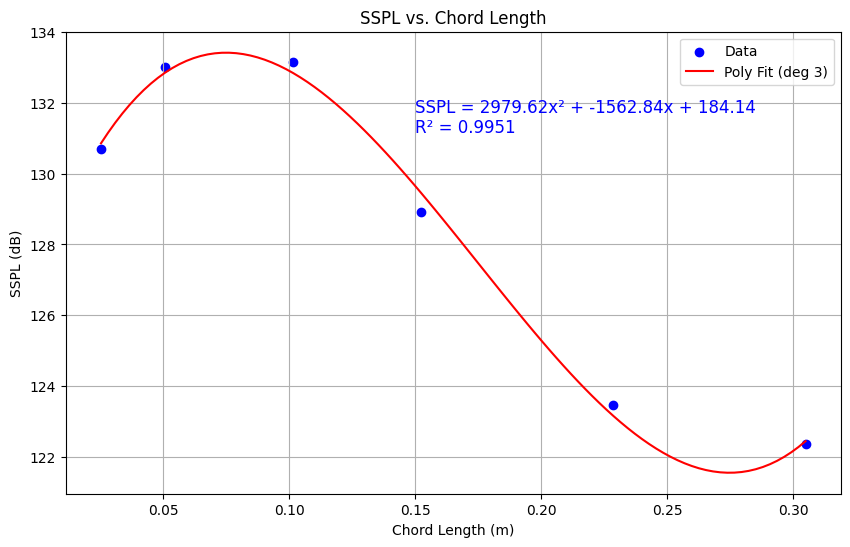

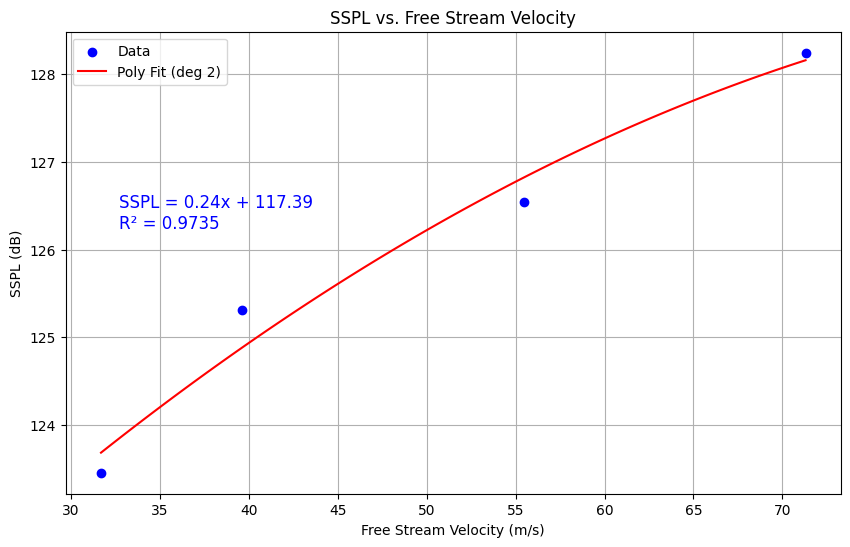

In [21]:
## MAE 301: Applied Experimental Statistics - Final Project: NASA Airfoil Self-Noise
# Members: Rudy Medrano, Justin Moralas, Omar Elaqad

# Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Data
data = pd.read_csv("/content/AirfoilSelfNoise.csv")

# Establish Variables
Frequency = data['f']
alpha = data['alpha']
chord = data['c']
FreeStream = data['U_infinity']
delta = data['delta']
SSPL = data['SSPL']

# Target Conditions
target_freq = 2000  # Hz
target_alpha = 0    # deg
target_FreeStream = 31.7  # m/s

# Chord Length Analysis

# Filter data
chord_constraint = (Frequency == target_freq) & (alpha == target_alpha) & (FreeStream == target_FreeStream)
chord_filtered = data.loc[chord_constraint, 'c']
SSPL_chord_filtered = data.loc[chord_constraint, 'SSPL']

# Polynomial Regression
coeffs_chord = np.polyfit(chord_filtered, SSPL_chord_filtered, deg=3)
poly_chord = np.poly1d(coeffs_chord)
y_chord_pred = poly_chord(chord_filtered)

# R² Calculation
ss_res_chord = np.sum((SSPL_chord_filtered - y_chord_pred) ** 2)
ss_tot_chord = np.sum((SSPL_chord_filtered - np.mean(SSPL_chord_filtered)) ** 2)
r2_chord = 1 - (ss_res_chord / ss_tot_chord)

# Plot
x_chord = np.linspace(chord_filtered.min(), chord_filtered.max(), 100)
y_chord = poly_chord(x_chord)

plt.figure(figsize=(10, 6))
plt.scatter(chord_filtered, SSPL_chord_filtered, color='blue', label='Data')
plt.plot(x_chord, y_chord, color='red', label='Poly Fit (deg 3)')
plt.title('SSPL vs. Chord Length')
plt.xlabel('Chord Length (m)')
plt.ylabel('SSPL (dB)')
plt.grid(True)

# Annotations
eq_chord = f"SSPL = {coeffs_chord[0]:.2f}x² + {coeffs_chord[1]:.2f}x + {coeffs_chord[2]:.2f}"
plt.text(0.15, max(SSPL_chord_filtered)-2, eq_chord + f"\nR² = {r2_chord:.4f}", fontsize=12, color='blue')
plt.legend()
plt.show()

# Free Stream Velocity Analysis

# Filter data
FreeStream_constraint = (Frequency == target_freq) & (alpha == target_alpha) & (chord == 0.2286)
FreeStream_filtered = data.loc[FreeStream_constraint, 'U_infinity']
SSPL_fs_filtered = data.loc[FreeStream_constraint, 'SSPL']

# Polynomial Regression
coeffs_fs = np.polyfit(FreeStream_filtered, SSPL_fs_filtered, deg=2)
poly_fs = np.poly1d(coeffs_fs)
y_fs_pred = poly_fs(FreeStream_filtered)

# R² Calculation
ss_res_fs = np.sum((SSPL_fs_filtered - y_fs_pred) ** 2)
ss_tot_fs = np.sum((SSPL_fs_filtered - np.mean(SSPL_fs_filtered)) ** 2)
r2_fs = 1 - (ss_res_fs / ss_tot_fs)

# Plot
x_fs = np.linspace(FreeStream_filtered.min(), FreeStream_filtered.max(), 100)
y_fs = poly_fs(x_fs)

plt.figure(figsize=(10, 6))
plt.scatter(FreeStream_filtered, SSPL_fs_filtered, color='blue', label='Data')
plt.plot(x_fs, y_fs, color='red', label='Poly Fit (deg 2)')
plt.title('SSPL vs. Free Stream Velocity')
plt.xlabel('Free Stream Velocity (m/s)')
plt.ylabel('SSPL (dB)')
plt.grid(True)

# Annotations
eq_fs = f"SSPL = {coeffs_fs[1]:.2f}x + {coeffs_fs[2]:.2f}"
plt.text(FreeStream_filtered.min() + 1, max(SSPL_fs_filtered)-2, eq_fs + f"\nR² = {r2_fs:.4f}", fontsize=12, color='blue')
plt.legend()
plt.show()



As demonstrated above, SSPL appears to decrease with increasing chord length; and increase with increasing Free Stream Velocity.

**Experiment 2: SSPL in relation to changing Chord Length and Free Stream Velocity**

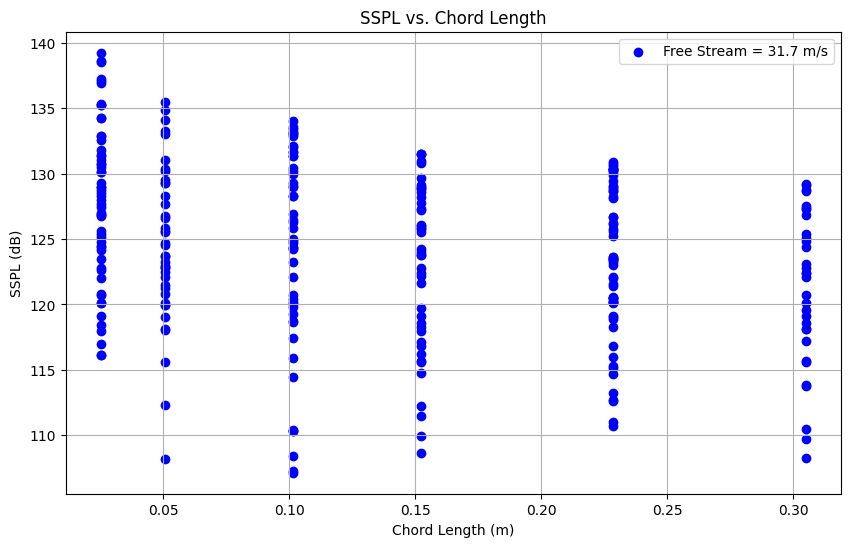

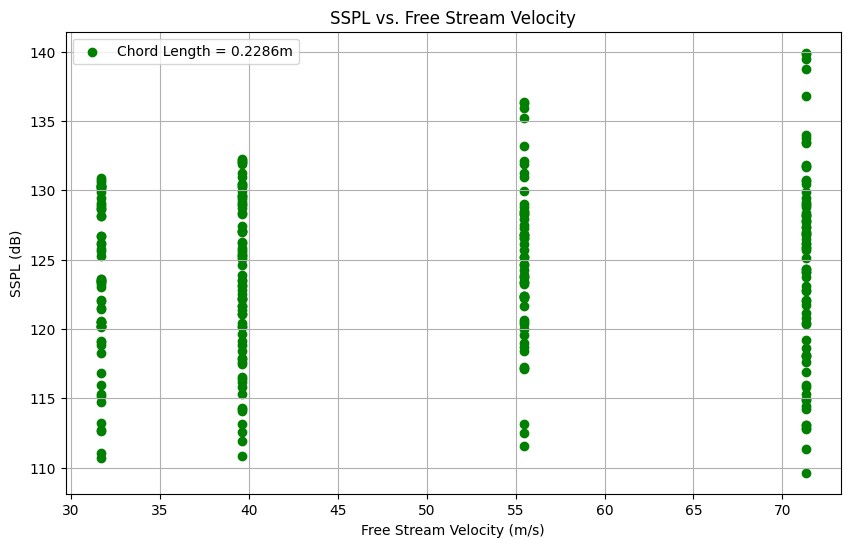

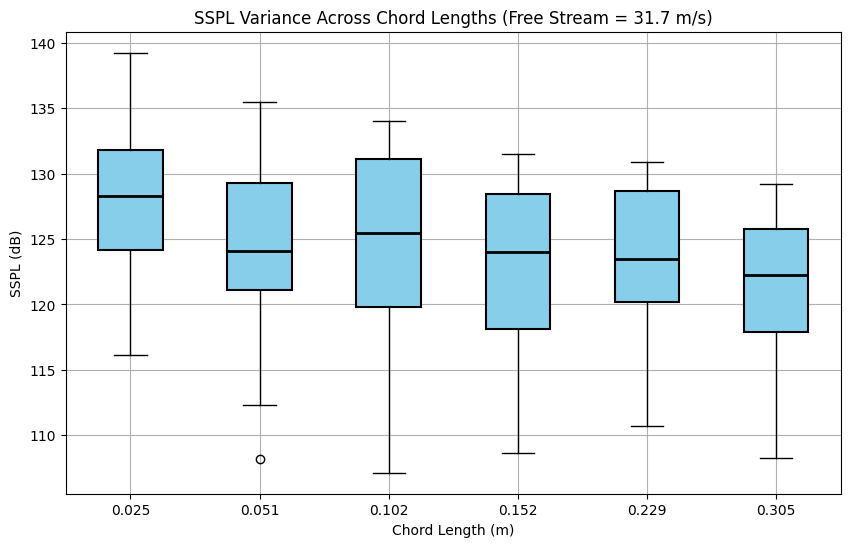

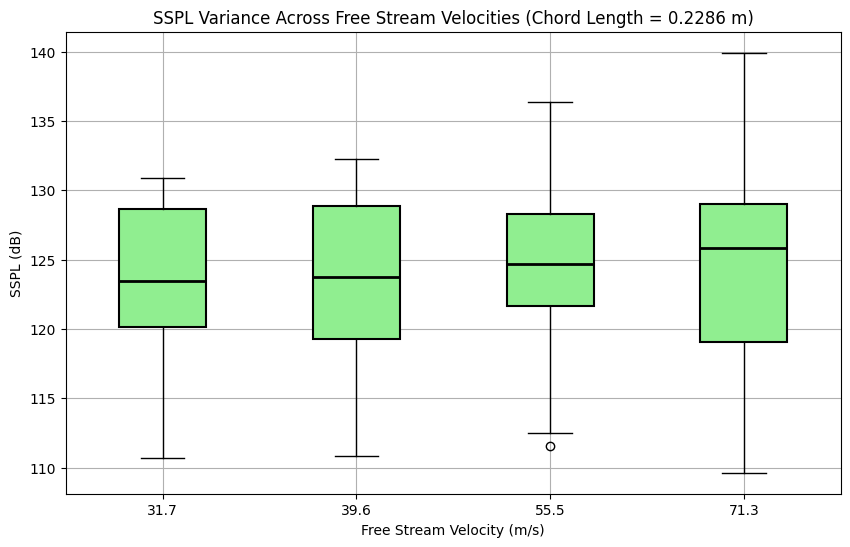

In [ ]:
## MAE 301: Applied Experimental Statistics - Final Project: NASA Airfoil Self-Noise
# Members: Rudy Medrano, Justin Moralas, Omar Elaqad

## Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load Data
data = pd.read_csv("/content/AirfoilSelfNoise.csv")

## Establish Variables
Frequency = data['f'] # Frequency, in Hertz [Hz]
alpha = data['alpha'] # Angle of attack, in degrees [deg]
chord = data['c'] # Chord Length, in meters [m]
FreeStream = data['U_infinity'] # Free Stream Velocity, in meters per second [m/s
delta = data['delta'] # Suction Side Displacement Thickness, in meters [m]
SSPL = data['SSPL'] # Scaled Sound Pressure Level, in decibels [dB]

## Experiment 1: SSPL as a function of Chord Length and Free Stream Velocity

# Establish Target Values
target_FreeStream = 31.7 # Target Free Stream Velocity, in meters per second [m/s]

# Create the Constraints for the Chord Length Experiment
chord_constraint =  (FreeStream == target_FreeStream)

# Filter the Data
chord_filtered = data.loc[chord_constraint, 'c']
SSPL_filtered = data.loc[chord_constraint, 'SSPL']

# Plotting SSPL as a function of Chord Length
plt.figure(figsize=(10, 6))
plt.scatter(chord_filtered, SSPL_filtered, color='blue', label='Free Stream = 31.7 m/s')
plt.title('SSPL vs. Chord Length')
plt.xlabel('Chord Length (m)')
plt.ylabel('SSPL (dB)')
plt.grid(True)
plt.legend()
plt.show()

# Create the Constraints for the Free Stream Experiment
FreeStream_constraint = (chord == 0.2286)

# Filter the Data
FreeStream_filtered = data.loc[FreeStream_constraint, 'U_infinity']
SSPL_filtered = data.loc[FreeStream_constraint, 'SSPL']

# Plotting SSPL as a function of Free Stream Velocity
plt.figure(figsize=(10, 6))
plt.scatter(FreeStream_filtered, SSPL_filtered, color='green', label='Chord Length = 0.2286m')
plt.title('SSPL vs. Free Stream Velocity')
plt.xlabel('Free Stream Velocity (m/s)')
plt.ylabel('SSPL (dB)')
plt.legend()
plt.grid(True)

# Boxplot 1: SSPL grouped by Chord Length (solid color)
plt.figure(figsize=(10, 6))
grouped_chords = data.loc[chord_constraint].groupby('c')['SSPL'].apply(list)
box1 = plt.boxplot(grouped_chords.values, tick_labels=[f"{c:.3f}" for c in grouped_chords.index], patch_artist=True)

# Set solid color (e.g., skyblue) for all boxes
for patch in box1['boxes']:
    patch.set_facecolor('skyblue')
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

# Make median lines black and thicker
for median in box1['medians']:
    median.set_color('black')
    median.set_linewidth(2)

plt.title('SSPL Variance Across Chord Lengths (Free Stream = 31.7 m/s)')
plt.xlabel('Chord Length (m)')
plt.ylabel('SSPL (dB)')
plt.grid(True)
plt.show()


# Boxplot 2: SSPL grouped by Free Stream Velocity (solid color)
plt.figure(figsize=(10, 6))
grouped_velocities = data.loc[FreeStream_constraint].groupby('U_infinity')['SSPL'].apply(list)
box2 = plt.boxplot(grouped_velocities.values, tick_labels=[f"{v:.1f}" for v in grouped_velocities.index], patch_artist=True)

# Set solid color (e.g., lightgreen) for all boxes
for patch in box2['boxes']:
    patch.set_facecolor('lightgreen')
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

# Make median lines black and thicker
for median in box2['medians']:
    median.set_color('black')
    median.set_linewidth(2)

plt.title('SSPL Variance Across Free Stream Velocities (Chord Length = 0.2286 m)')
plt.xlabel('Free Stream Velocity (m/s)')
plt.ylabel('SSPL (dB)')
plt.grid(True)
plt.show()


*F-testing - We want to evaluate if there is a significant difference in variance between a low length chord vs. high length chord in order to further analysis the mean with t-testing. *

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f

# dataset
data = pd.read_csv(r'/content/AirfoilSelfNoise.csv')

# Low and high chord ranges
low_chord_lengths = [0.0254, 0.0508, 0.1016]
high_chord_lengths = [0.1524, 0.2286, 0.3048]

# Filtered low and high chord lengths
low_group = data[data['c'].isin(low_chord_lengths)]
high_group = data[data['c'].isin(high_chord_lengths)]

# Low and High SSPL filtered data
low_SSPL = low_group['SSPL']
high_SSPL = high_group['SSPL']

# Comutations for mean, std, and variance
def calc_mean_std_var(values):
    mean = sum(values) / len(values)
    variance = sum((x - mean) ** 2 for x in values) / (len(values) - 1)
    std = variance ** 0.5
    return mean, std, variance

mean_low, std_low, var_low = calc_mean_std_var(low_SSPL)
mean_high, std_high, var_high = calc_mean_std_var(high_SSPL)

# F-test
F = var_low / var_high if var_low > var_high else var_high / var_low
df1 = len(low_SSPL) - 1
df2 = len(high_SSPL) - 1
alpha = 0.05
F_crit_low = f.ppf(alpha / 2, df1, df2)
F_crit_high = f.ppf(1 - alpha / 2, df1, df2)

# Results
print(f"Low Chord SSPL → Mean: {mean_low:.3f}, Std: {std_low:.3f}, Var: {var_low:.3f}")
print(f"High Chord SSPL → Mean: {mean_high:.3f}, Std: {std_high:.3f}, Var: {var_high:.3f}")
print(f"F-statistic: {F:.3f}")
print(f"Critical F-values: ({F_crit_low:.3f}, {F_crit_high:.3f})")

if F < F_crit_low or F > F_crit_high:
    print("Reject the null hypothesis → Variances are significantly different.")
else:
    print("Fail to reject the null hypothesis → No significant difference in variances.")
    # One-tailed p-value
p_one_tailed = 1 - f.cdf(F, df1, df2)

# Two-tailed p-value
p_value = 2 * p_one_tailed
print(' p value is ', p_value)
if p_value < alpha:
    print(' Reject null hypothesis s_low^2 = s_high^2')
else:
   print( ' Fail to reject null hypothesis as p value is greater than critical value ')

Low Chord SSPL → Mean: 126.459, Std: 6.730, Var: 45.296
High Chord SSPL → Mean: 123.094, Std: 6.652, Var: 44.251
F-statistic: 1.024
Critical F-values: (0.867, 1.154)
Fail to reject the null hypothesis → No significant difference in variances.
 p value is  0.7499423417451492
 Fail to reject null hypothesis as p value is greater than critical value 


T -Testing

H0  : There is no significant difference in mean  μLow=μHigh
H1  : There is a significance in mean  μLow≠μHigh

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import t
import os

data = pd.read_csv(r'/content/AirfoilSelfNoise.csv')

# Low and High chord length

Low_chord_length = [ 0.0254, 0.0508, 0.1016]
High_chord_length = [ 0.1524, 0.2286, 0.3048]

# Filtering chord data
Low_chord = data[data['c'].isin(Low_chord_length)]
High_chord = data[data['c'].isin(High_chord_length)]

Low_chord_group = Low_chord['SSPL']
High_chord_group = High_chord['SSPL']
# Defining our statistic formulas used

def calc_mean_std_var(values):
    mean = sum(values)/len(values)
    variance = sum((x-mean)**2 for x in values) / (len(values) -1)
    std = variance**0.5
    return mean, variance, std

# Computing mean,stand deviation, and variance for low and high chord groups
mean_low,var_low,std_low = calc_mean_std_var(Low_chord_group)
mean_high,var_high,std_high = calc_mean_std_var(High_chord_group)

# Degrees of freedom
n_1, n_2 = len(Low_chord_group),len(High_chord_group)
df = ((var_low/n_1+var_high/n_2)**2)/((var_low/n_1)**2/(n_1-1) + (var_high/n_2)**2/(n_2-1))

# T-statistic
t_stat = (mean_low-mean_high)/np.sqrt((var_low/n_1)+(var_high/n_2))

# Critical level
alpha = 0.05

# Tail bounds
t_critical_left = t.ppf( alpha/2 ,df)
t_critical_right = t.ppf(1-alpha/2, df)
# Diplays parameters
print(f" Low Chord SSPL → Mean : {mean_low:.2f}, Std: {std_low:.2f}, var: {var_low:.2f}  ")
print(f" High Chord SSPL→ Mean : {mean_high:.2f}, Std: {std_high:.2f}, var:{var_high:.2f} ")
print(f"Critical t-values: Left = {t_critical_left:.2f}, Right = {t_critical_right:.2f}")
print(f"T statistic: {t_stat:.2f}")

# Analysis
if t_stat>t_critical_right or t_stat< t_critical_left:
    print(" Mean is significantly different therefore we reject the null hypthosis")
else:
    print( " Mean is not significantly different therefore we fail to reject the null hypothesis")


 Low Chord SSPL → Mean : 126.46, Std: 6.73, var: 45.30  
 High Chord SSPL→ Mean : 123.09, Std: 6.65, var:44.25 
Critical t-values: Left = -1.96, Right = 1.96
T statistic: 9.74
 Mean is significantly different therefore we reject the null hypthosis


**SSA ANOVA TESTING**


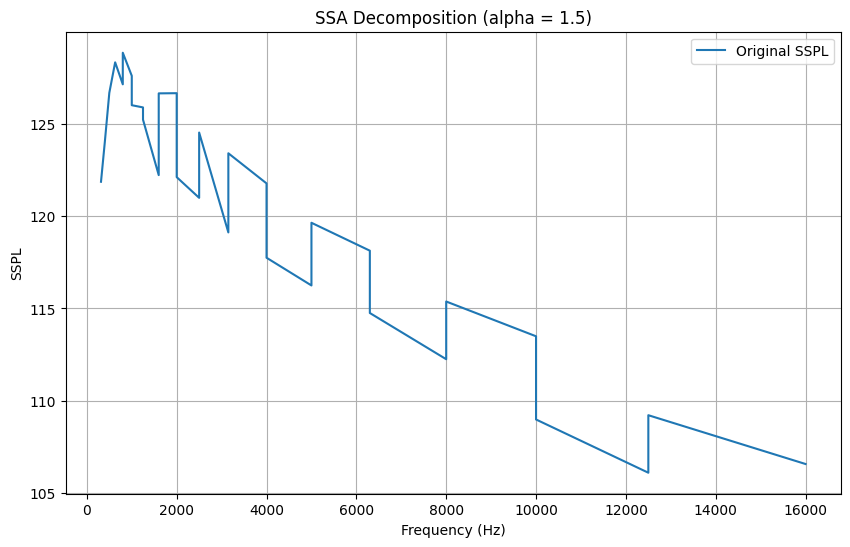

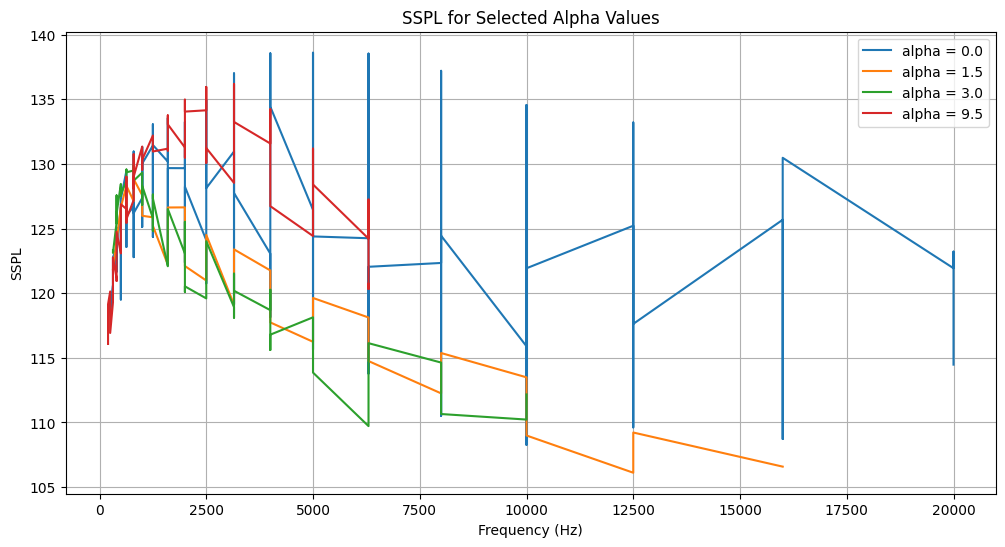

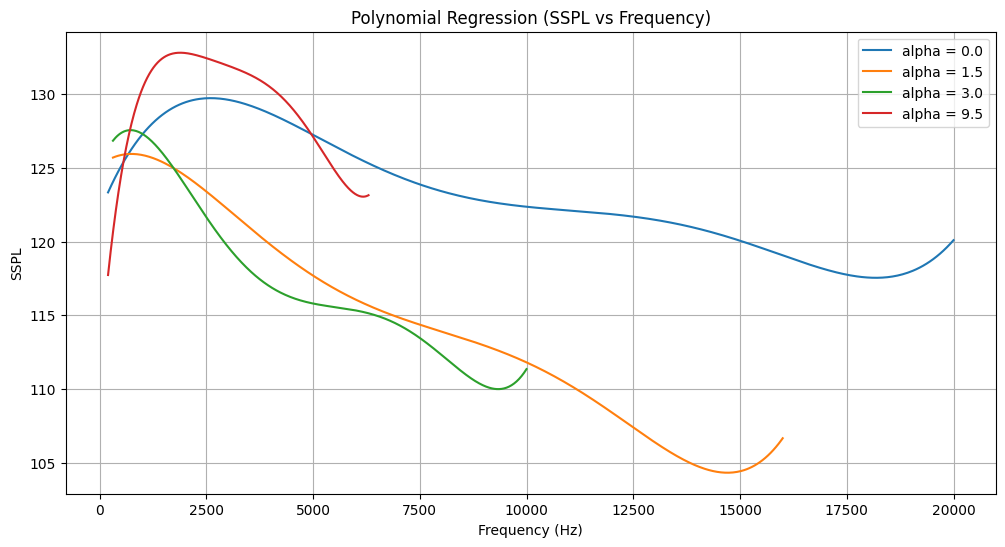

F-statistic: 20.261
p-value: 2.295e-12

SSA (Between Groups): 2075.234
SSE (Within Groups): 16080.367
SST (Total): 18155.601
SSA + SSE = 18155.601 (This is Equal to SST)


In [ ]:
# SSA ANOVA Testing on Selected Alpha Values

# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from scipy.stats import f_oneway
from numpy.polynomial import Polynomial

# Load the dataset
data = pd.read_csv('/content/AirfoilSelfNoise.csv')

# Manual SSA
def embed_series(x, L):
    N = len(x)
    K = N - L + 1
    return np.column_stack([x[i:i+K] for i in range(L)])

def ssa_decompose(x, L):
    X = embed_series(x, L)
    U, S, VT = svd(X, full_matrices=False)
    X_elem = np.array([S[i] * np.outer(U[:, i], VT[i, :]) for i in range(len(S))])

    def hankelize(Xi):
        L, K = Xi.shape
        N = L + K - 1
        x_rec = np.zeros(N)
        for k in range(N):
            sum_ = 0
            count = 0
            for i in range(max(0, k - K + 1), min(L, k + 1)):
                sum_ += Xi[i, k - i]
                count += 1
            x_rec[k] = sum_ / count
        return x_rec

    return [hankelize(Xi) for Xi in X_elem]

# SSA Decomposition @ alpha
filtered = data[data['alpha'] == 1.5].sort_values('f')
frequency_plot = filtered['f'].values
sspl_plot = filtered['SSPL'].values

components_plot = ssa_decompose(sspl_plot, L=150)

plt.figure(figsize=(10,6))
plt.plot(frequency_plot, sspl_plot, label='Original SSPL')
for i, comp in enumerate(components_plot[:3]):
    plt.plot(frequency_plot, comp[:len(frequency_plot)], label=f'Component {i+1}')
plt.title("SSA Decomposition (alpha = 1.5)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("SSPL")
plt.legend()
plt.grid(True)
plt.show()

# Selcted Alpha Values
selected_alphas = [0, 1.5, 3, 9.5]

grouped_sspl = []
alpha_labels = []

for alpha_val in selected_alphas:
    subset = data[data['alpha'] == alpha_val].sort_values('f')
    y = subset['SSPL'].values
    if len(y) < 30:  # Skip small groups if any
        continue
    grouped_sspl.append(y)
    alpha_labels.append(alpha_val)

# Plotting
plt.figure(figsize=(12,6))
for alpha_val, y in zip(alpha_labels, grouped_sspl):
    subset = data[data['alpha'] == alpha_val].sort_values('f')
    f_values = subset['f'].values
    plt.plot(f_values, y, label=f'alpha = {alpha_val:.1f}')
plt.title('SSPL for Selected Alpha Values')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSPL')
plt.legend()
plt.grid(True)
plt.show()

# Polynomial Regression
plt.figure(figsize=(12,6))

for alpha_val, y in zip(alpha_labels, grouped_sspl):
    subset = data[data['alpha'] == alpha_val].sort_values('f')
    f_values = subset['f'].values

    # Polynomial regression
    degree = 5
    coefs = np.polyfit(f_values, y, deg=degree)
    poly_fit = np.poly1d(coefs)

    # Smoothen
    f_smooth = np.linspace(f_values.min(), f_values.max(), 500)
    y_smooth = poly_fit(f_smooth)

    plt.plot(f_smooth, y_smooth, label=f'alpha = {alpha_val:.1f}')

plt.title('Polynomial Regression (SSPL vs Frequency)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSPL')
plt.legend()
plt.grid(True)
plt.show()

# ANOVA test
F_statistic, p_val = f_oneway(*grouped_sspl)
print(f"F-statistic: {F_statistic:.3f}")
print(f"p-value: {p_val:.3e}")

# Manual calculation of ANOVA components
all_values = np.concatenate(grouped_sspl)
overall_mean = np.mean(all_values)

# SSA (between groups)
SSA = sum(len(group) * (np.mean(group) - overall_mean) ** 2 for group in grouped_sspl)

# SSE (within groups)
SSE = sum(sum((x - np.mean(group)) ** 2 for x in group) for group in grouped_sspl)

# SST (total)
SST = sum((x - overall_mean) ** 2 for x in all_values)

print(f"\nSSA (Between Groups): {SSA:.3f}")
print(f"SSE (Within Groups): {SSE:.3f}")
print(f"SST (Total): {SST:.3f}")
print(f"SSA + SSE = {SSA + SSE:.3f} (This is Equal to SST)")


In [ ]:
#